# 0.0. Imports

In [1]:
# data manipulation
import numpy as np 
import pandas as pd
import datetime

# text
import inflection

# math
import math

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# image
from IPython.display import Image

## 0.1. Helper Functions

In [2]:
# notebook settings
def notebook_settings():
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [20,10]
    plt.rcParams['font.size'] = 10

In [3]:
notebook_settings()

## 0.2. Loading Data

In [4]:
# using pandas to read csv files
rossman_raw_train = pd.read_csv('../data/train.csv', parse_dates=['Date'], low_memory=False) # parse_data change object to datetime
rossman_raw_store = pd.read_csv('../data/store.csv', low_memory=False)

# merge train and store dataset
df_raw = pd.merge(rossman_raw_train, rossman_raw_store, how='left', on ='Store')

# 1.0. Data Description

In [5]:
# copy for section 1.0
df1 = df_raw.copy()

## 1.1. Rename Columns

In [6]:
# list of columns name
col_old = df1.columns

# loop for snakecase pattern
snakecase = lambda x: inflection.underscore(x)

# setting list for new columns 
col_new = list(map(snakecase, col_old))

# change names
df1.columns = col_new

## 1.2. Data Dimension

In [7]:
# show information about data dimension
print(f'Number of rows: {df1.shape[0]} \nNumber of columns: {df1.shape[1]}')

Number of rows: 1017209 
Number of columns: 18


## 1.3. Data Type

In [8]:
# checking data types
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Checking Null Values

In [9]:
# checking missing values
df1.isnull().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout Null Values

### 1.5.a competition_distance

Null Values will represent a big distance from other stores, something bigger than max value presents in data.

In [10]:
# fill null values
df1.competition_distance = df1.competition_distance.fillna(200000)

### 1.5.b competition_open_since_month

Using `date` column to fill out the null value

In [11]:
# competition open since month function 
comp_open_month = lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) \
    else x['competition_open_since_month']

df1['competition_open_since_month'] = df1.apply(comp_open_month, axis=1)

### 1.5.c competition_open_since_year

Same idea for the previous section

In [12]:
# competition open since year function 
comp_open_year = lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) \
    else x['competition_open_since_year']

df1['competition_open_since_year'] = df1.apply(comp_open_year, axis=1)

### 1.5.d promo2_since_week

Using the same logic from the previous section

In [13]:
promo2_sw = lambda x: x['date'].week if math.isnan(x['promo2_since_week']) \
    else x['promo2_since_week']

df1['promo2_since_week'] = df1.apply(promo2_sw, axis=1)

### 1.5.e promo2_since_year

Using the same logic from the previous section

In [14]:
promo2_sy = lambda x: x['date'].year if math.isnan(x['promo2_since_year']) \
    else x['promo2_since_year']

df1['promo2_since_year'] = df1.apply(promo2_sy, axis=1)

### 1.5.f promo_interval

If date column is inside the promo column, then let's say it was a promoted day.

In [15]:
# list with months names
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# list with number sequence
number_seq = np.arange(1,13).tolist()

# converting two lists into a dictionary
promo_month = dict(zip(number_seq, month_list))

# converting null values into 0
df1['promo_interval'].fillna(0, inplace=True)

# Coluns with month names
df1['month_map'] = df1['date'].dt.month.map(promo_month)

# function to detect promo times
is_promo_function = lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map']\
     in x['promo_interval'].split(',') else 0

# new column to promo
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(
    is_promo_function, axis=1)

In [16]:
# checking NaN again
df1.isnull().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6. Change Types

In [17]:
# checking types again
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [18]:
# list of columns who need to change type
change_type = [
    'competition_open_since_month', 'competition_open_since_year',
    'promo2_since_week', 'promo2_since_year'
    ]

# looping change type
for x in change_type:
    df1[x] = df1[x].astype(int)

## 1.7. Descriptive Statistical

Selecting variables by type, numerical and categorical

In [19]:
# selecting features by types
num_att = df1.select_dtypes(include=['int64', 'float64']) # selecting numerical features
cat_att = df1.select_dtypes(include=['object']) # selecting objects and datetime features

### 1.7.a Numerical Attributes

In [20]:
# describe function into variable
descriptive_1 = num_att.describe().T.reset_index()

# add range
descriptive_1['range'] = (num_att.max() - num_att.min()).tolist()
# add skew
descriptive_1['skew'] = num_att.skew().tolist()
# add kurtosis
descriptive_1['kurtosis'] = num_att.kurtosis().tolist()

In [21]:
# checking
descriptive_1

,index,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
0,store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0,1114.0,-0.000955,-1.200524
1,day_of_week,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0,6.0,0.001593,-1.246873
2,sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0,41551.0,0.641460,1.778375
3,customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0,7388.0,1.598650,7.091773
4,open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0,1.0,-1.758045,1.090723
5,promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0,1.0,0.487838,-1.762018
6,school_holiday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0,1.0,1.677842,0.815154
7,competition_distance,1017209.0,5935.442677,12547.652996,20.0,710.0,2330.0,6910.0,200000.0,199980.0,10.242344,147.789712
8,competition_open_since_month,1017209.0,6.786849,3.311087,1.0,4.0,7.0,10.0,12.0,11.0,-0.042076,-1.232607
9,competition_open_since_year,1017209.0,2010.324840,5.515593,1900.0,2008.0,2012.0,2014.0,2015.0,115.0,-7.235657,124.071304


#### > Skew

In [22]:
# creating list with skew classification
symmetrical = []
mod_skew = []
high_skew = []

# iterate 
for i in range(len(descriptive_1)):
    if descriptive_1.iloc[i, -2] > 1 or descriptive_1.iloc[i, -2] < -1:
        high_skew.append(descriptive_1.iloc[i, 0])
    elif 1 >= descriptive_1.iloc[i, -2] > 0.5:
        mod_skew.append(descriptive_1.iloc[i, 0])
    elif -0.5 > descriptive_1.iloc[i, -2] >= -1:
        mod_skew.append(descriptive_1.iloc[i, 0])
    else:
        symmetrical.append(descriptive_1.iloc[i, 0])

# print
print(symmetrical)
print(mod_skew)
print(high_skew)        

['store', 'day_of_week', 'promo', 'competition_open_since_month', 'promo2', 'promo2_since_week']
['sales', 'promo2_since_year']
['customers', 'open', 'school_holiday', 'competition_distance', 'competition_open_since_year', 'is_promo']


#### > Kurtosis

In [23]:
# creating list with skew classification
leptokurtic = []
mesokurtic = []
platykurtic = []

# iterate 
for i in range(len(descriptive_1)):
    if descriptive_1.iloc[i,-1] > 3:
        leptokurtic.append(descriptive_1.iloc[i, 0])
    elif descriptive_1.iloc[i,-1] == 3:
        mesokurtic.append(descriptive_1.iloc[i, 0])
    else:
        platykurtic.append(descriptive_1.iloc[i, 0])

# print
print(leptokurtic)
print(mesokurtic)
print(platykurtic)  

['customers', 'competition_distance', 'competition_open_since_year']
[]
['store', 'day_of_week', 'sales', 'open', 'promo', 'school_holiday', 'competition_open_since_month', 'promo2', 'promo2_since_week', 'promo2_since_year', 'is_promo']


### 1.7.b. Categorical Attributes

In [24]:
# checking unique attributes for categorical
cat_att.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

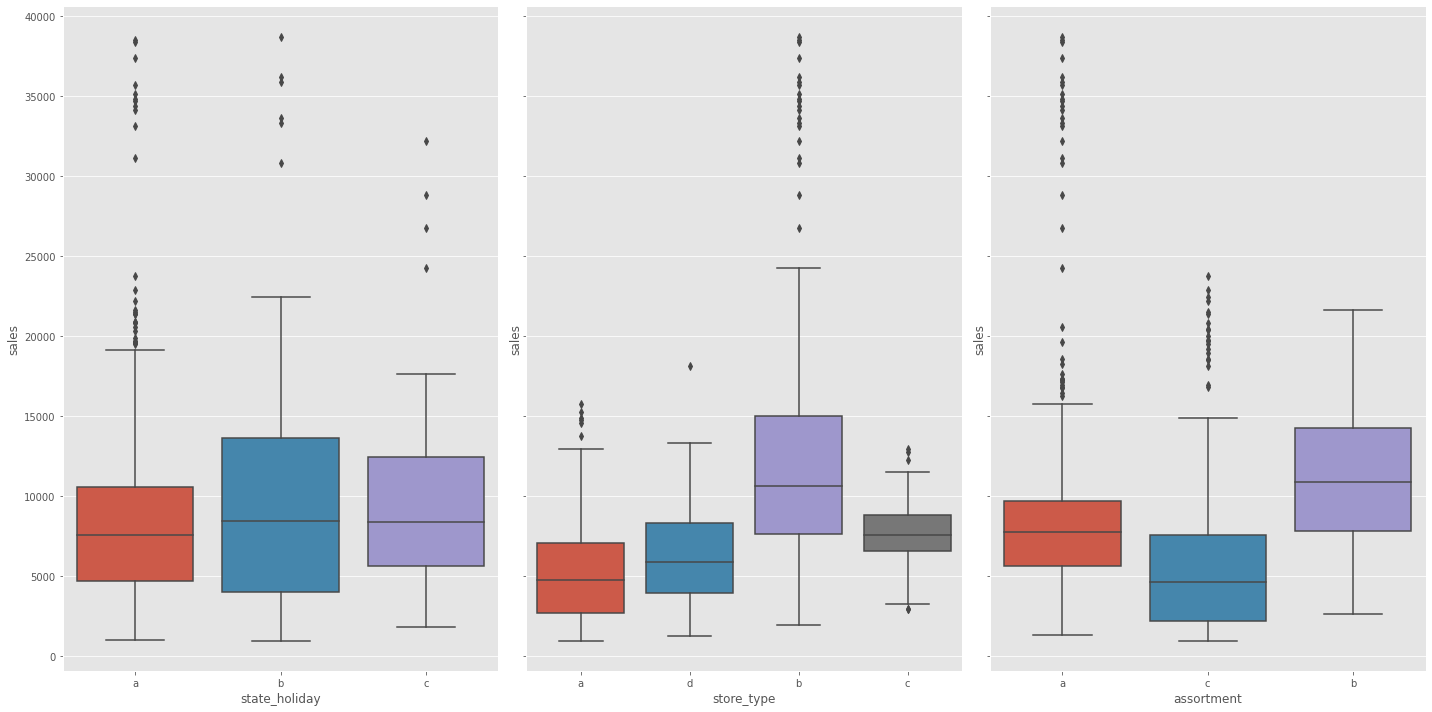

In [25]:
# filtering state_holiday without sales and promo
no_sales = df1[(df1.state_holiday != '0') & (df1.sales > 0)]

# violintplot to categorical attributes
fig, ax = plt.subplots(1, 3, sharey=True)
# state holiday
sns.boxplot(data=no_sales, x='state_holiday', y='sales', ax=ax[0])
# store type
sns.boxplot(data=no_sales, x='store_type', y='sales', ax=ax[1])
# assortment
sns.boxplot(data=no_sales, x='assortment', y='sales', ax=ax[2])

# adjust plot
plt.tight_layout()
# show plot
plt.show()

# 2.0. Feature Engineering

## 2.1. Hypothesis Mind Map

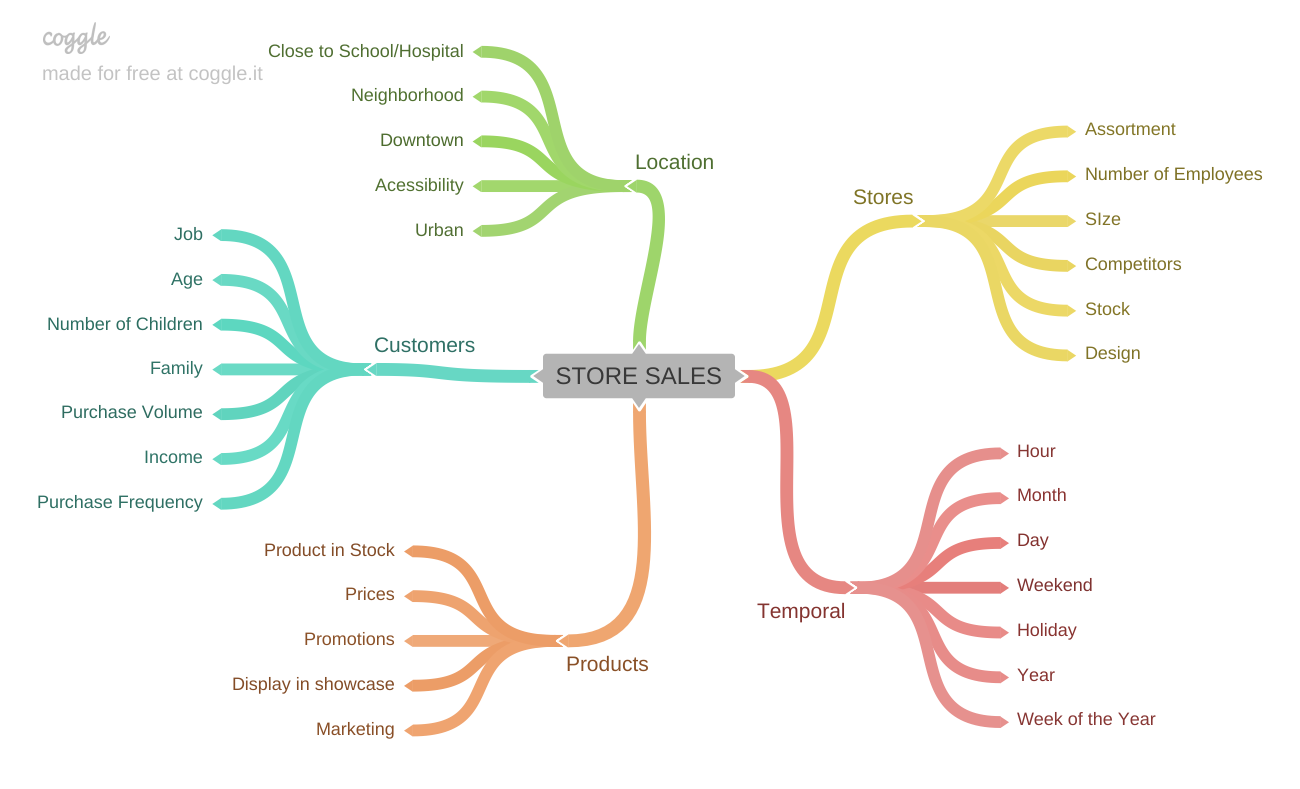

In [26]:
Image('../img/STORE_SALES.png')

## 2.2. Hypothesis Creation

### 2.2.a. Store

**1.** Stores with a larger workforce should sell more.

**2.** Stores with higher inventory should sell more.

**3.** Larger store should sell more.

**4.** Smaller Stores should sell more.

**5.** Stores with a larger assortment should sell more.

**6.** Stores with closer competitors should sell less.

**7.** Stores with longer competitors should sell more

### 2.2.b. Product

**1.** Stoers that invest more in marketing should sell more.

**2.** Stores that display more products in a showcase sell more.

**3.** Stores with smaller prices should sell more.

**4.** Stores that keep prices lower for longer should sell more.

**5.** Stores with active promotions for longer should sell more.

**6.** Stores with more promotion days should sell more.

### 2.2.c. Time

**1.** Stores should sell less on weekends.

**2.** Stores that open in the first 6 months should sell more.

**3.** Stores that open on weekends should sell more.

**4.** Stores open during the Christmas holiday should sell more.

**5.** Stores should be selling more over the years.

**6.** Stores should sell more in the second half of the year.

**7.** Stores should sell more after the 10th of each month.

**8.** Stores should sell less on weekends.

**9.** Stores should sell less during school holidays.

## 2.3. Final Hypothesis List

**01.** Stores with a larger assortment should sell more.

**02.** Stores with closer competitors should sell less.

**03.** Stores with longer competitors should sell more

**04.** Stores with active promotions for longer should sell more.

**05.** Stores with more promotion days should sell more.

**06.** Stores with more consecutive promotions should sell more.

**07.** Stores open during the Christmas holiday should sell more.

**08.** Stores should be selling more over the years.

**09.** Stores should sell more in the second half of the year.

**10.** Stores should sell more after the 10th of each month.

**11.** Stores should sell less on weekends.

**12.** Stores should sell less during school holidays.

## 2.4. Feature Enginneering

In [27]:
df2 = df1.copy()

### 2.4.a. Time

In [28]:
# year
df2['year'] = df2.date.dt.year

# month
df2['month'] = df2.date.dt.month

# day 
df2['day'] = df2.date.dt.day

# week of year
df2['week_of_year'] = df2.date.dt.isocalendar().week

# year week
df2['year_week'] = df2.date.dt.strftime('%Y-%W')

### 2.4.b. Competition and Promo

In [29]:
# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'],\
     month=x['competition_open_since_month'], day=1), axis=1)

df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta( days=7))
df2['promo_since_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

### 2.4.c. Assortment and Holidays

In [30]:
# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday

df2['state_holiday'] = df2['state_holiday'].apply(
    lambda x: 'public holiday' if x == 'a' else 'easter holiday' \
        if x == 'b' else 'christmas'\
             if x == 'c' else 'regular day')

# 3.0. Filtering Variables

In [31]:
df3 = df2.copy()

## 3.1. Row Filtering

In [32]:
# closed stores has no sales in that day.
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2. Columns Selection

In [33]:
# selecting columns to drop
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']

# drop columns
df3 = df3.drop(cols_drop, axis=1)

# 4.0. Exploratory Data Analysis

In [34]:
# copy for EDA
df4 = df3.copy()

## 4.1. Univariate Analysis

### 4.1.a. Target Variable

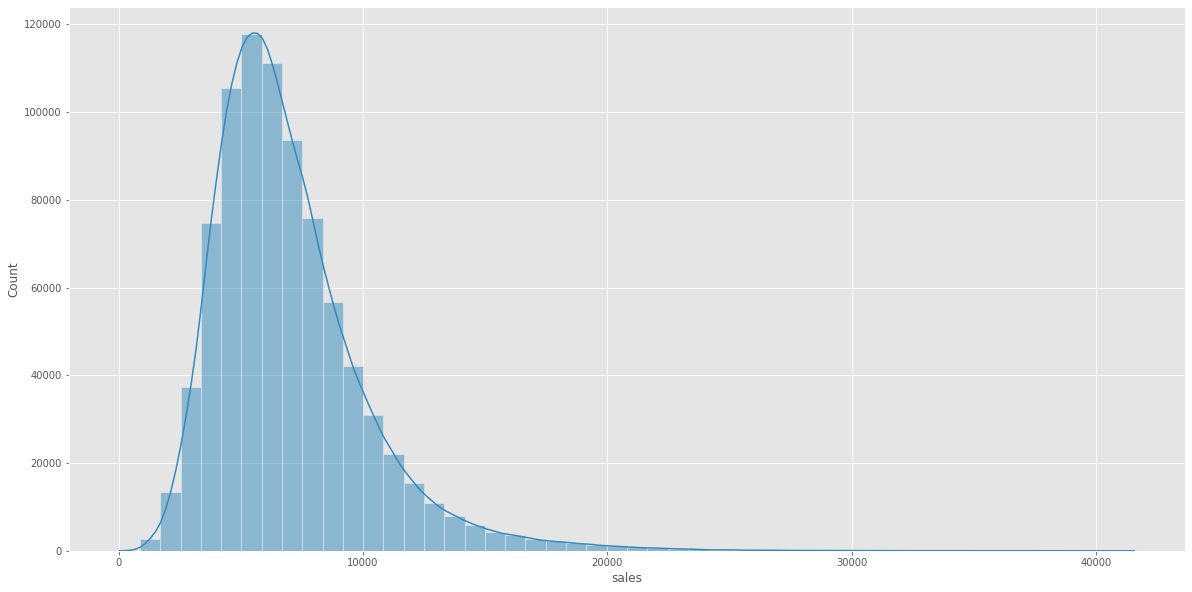

In [35]:
# checking density of target variable
sns.histplot(df3.sales, kde=True, bins = 50)
# show plot
plt.show()

### 4.1.b.Numerical Variable

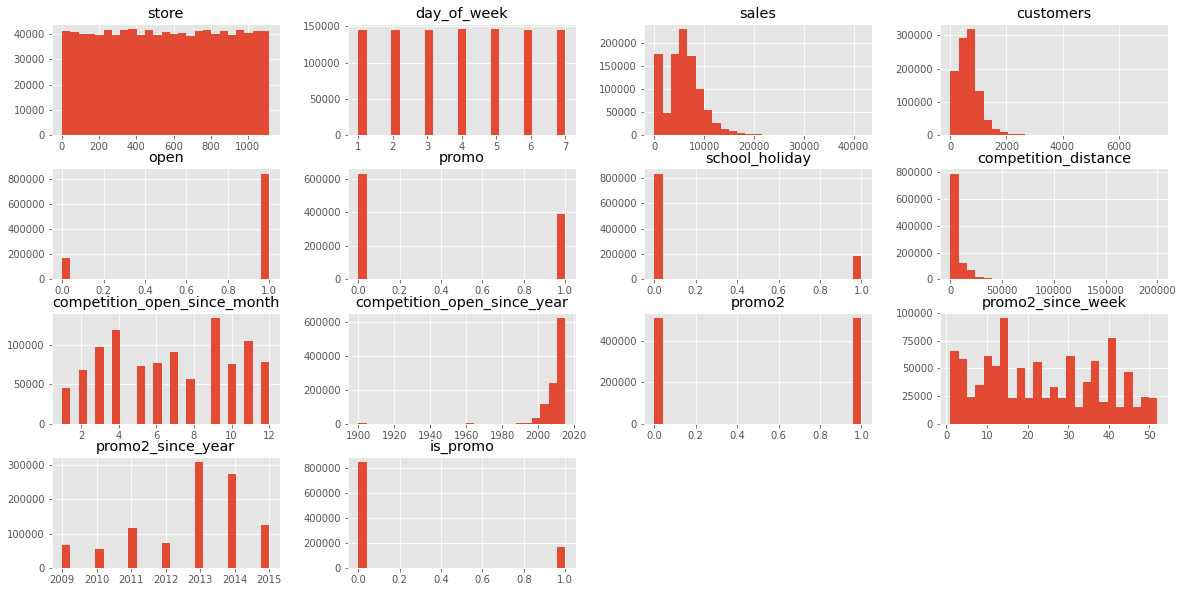

In [36]:
# checking numerical variables
num_att.hist(bins=20);

Some observations:
* `customers` - higher sales when the customer range is between 0 and 2000.
* `competition distance` - grand part of competitors are very close.
* `competition_open_since_month` - most of competitors are concentrated at beginning and end of the year, November has the highest concentration. 
* `competition_open_since_year` - between 2010 and 2015 had the biggest increase in competitors.
* `is_promo` - there is more sales when don't have promotion.

### 4.1.c. Categorical Variable

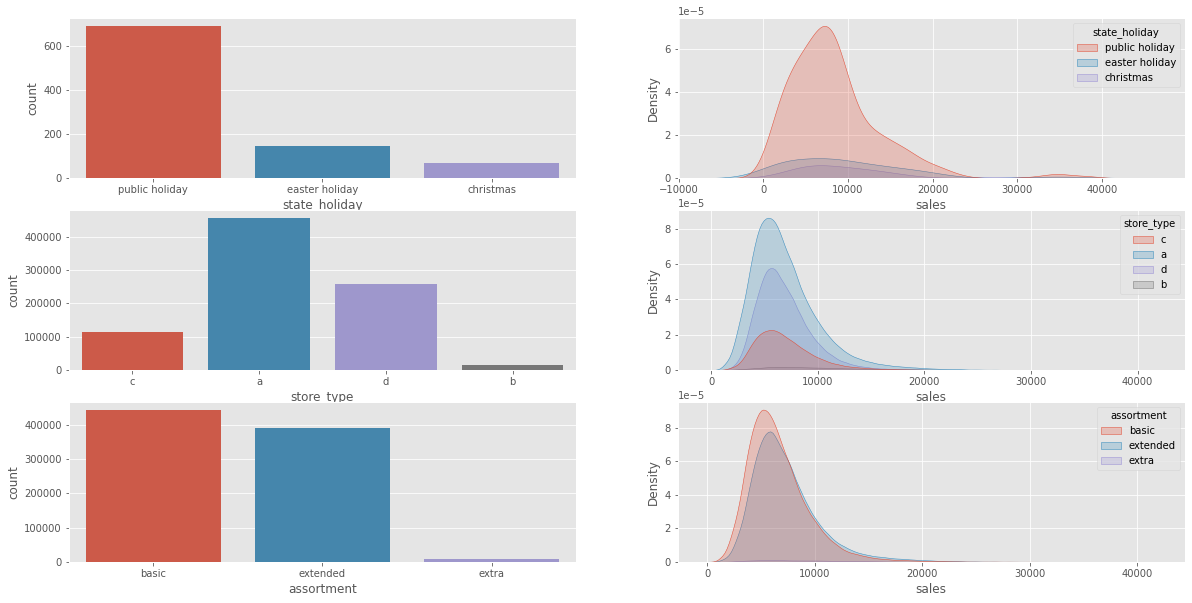

In [89]:
# removing regular day to a better visualize
no_rd = df4.query('state_holiday != "regular day"')

# setting fig and axes
fig, ax = plt.subplots(3,2)
# subplot 1
sns.countplot(x=no_rd['state_holiday'], ax=ax[0,0])
# subplot 2
sns.kdeplot(data=no_rd, x='sales', hue= 'state_holiday', shade=True, ax=ax[0,1])
# subplot 3
sns.countplot(x=df4['store_type'], ax=ax[1,0])
# subplot 4
sns.kdeplot(data=df4, x='sales', hue='store_type', shade=True, ax=ax[1,1])
# subplot 5
sns.countplot(x=df4['assortment'], ax=ax[2,0])
# subplot 6
sns.kdeplot(data=df4, x='sales', hue='assortment', shade=True, ax=ax[2,1])
# plot show
plt.show()